# QUESTION 1
You have to create a function that receives a list of numbers like [23,14,13,56,78,98,12] and returns it's Interquartile range(IQR)

Note: You have to code the logic from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [49]:
mylist=[12,14,13,23,56,78,98]
iqr=np.percentile(a,75)-np.percentile(a,25)
print(iqr)


53.5


In [50]:
def median(mylist, l, r): 
    n = r - l + 1
    n = (n + 1) // 2 - 1
    return n + l 
def IQR(mylist, n): 
    mylist.sort() 
    mid_index = median(mylist, 0, n) 
    Q1 = mylist[median(mylist, 0, mid_index)] 
    Q3 = mylist[median(mylist, mid_index + 1, n)] 
    return (Q3 - Q1)

In [51]:
mylist=[23,14,13,56,78,98,12]
n=len(mylist)
IQR(mylist,n)

65

# Question 2:
Plot a histogram for total team scores for all IPL games.

Note: Per match 2 teams will play hence total number scores would be = no. of matches * 2

In [56]:
delivery=pd.read_csv('deliveries.csv')
match=pd.read_csv('matches.csv')


In [57]:
delivery.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


(array([  1.,   3.,  20.,  66., 198., 414., 378., 160.,  26.,   4.]),
 array([  2. ,  28.1,  54.2,  80.3, 106.4, 132.5, 158.6, 184.7, 210.8,
        236.9, 263. ]),
 <a list of 10 Patch objects>)

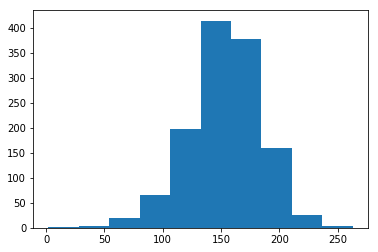

In [59]:
x=delivery['inning']==1
y=delivery['inning']==2
x=delivery[x|y]
m=x.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
n=m['total_runs'].values
plt.hist(n)

# Question 3:
Find the skewness of bowler economy data where the bowler has bowled a minimum of 300 balls.

Note : if you don't know about economy read this https://en.wikipedia.org/wiki/Economy_rate_(cricket)

In [60]:
delivery.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


0.10811583248529329


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


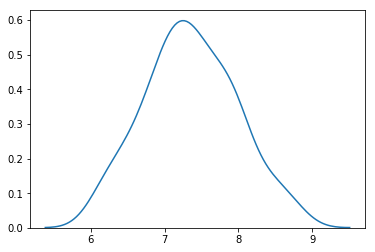

In [61]:
c=delivery.groupby('bowler')['ball'].count().reset_index()
mask1=c['ball']>=300
a=c[mask1]
b=a['bowler'].reset_index()
d=b.merge(delivery)
r=d.groupby('bowler')['batsman_runs'].sum()
o=delivery.groupby('bowler')['ball'].count()
e=(r/o)*6
print(e.skew())
sns.kdeplot(e)

# Question 4:
Give three examples of negatively skewed data and 3 examples of positively skewed data

In [ ]:
Negative Skewness:
1.Death of people of a country

2.grades of student in school

3.Negative house prices

Positive Skewness:
1.Wealth of a person in a country

2.Marks obtained by students in a difficult exam

3.Price of electronic gadgets